<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%AD%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 70.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=0d388a129976574cdd04dbeb9519640baebe90f31f9efc6cafef2894cbb08e70
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


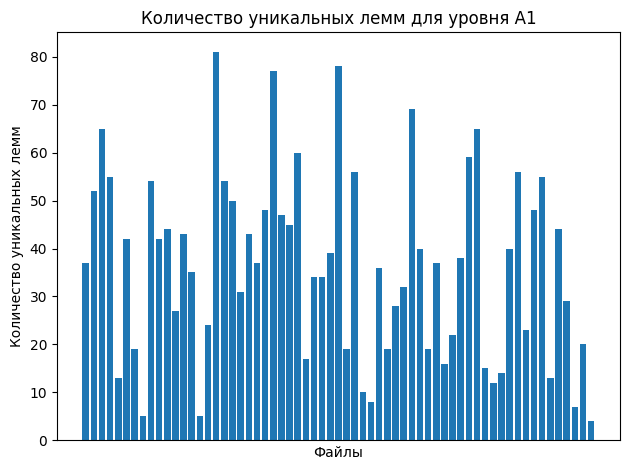

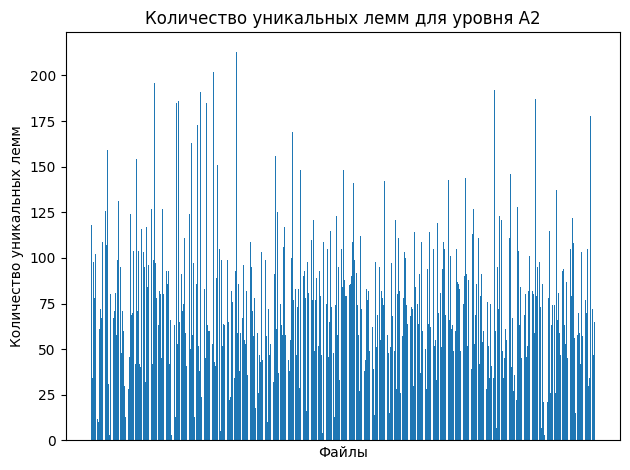

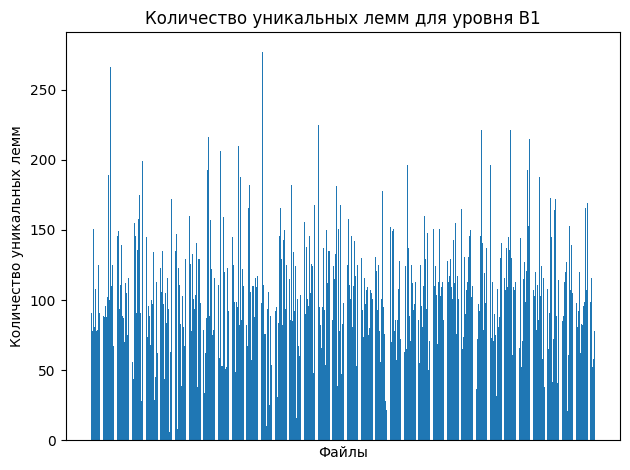

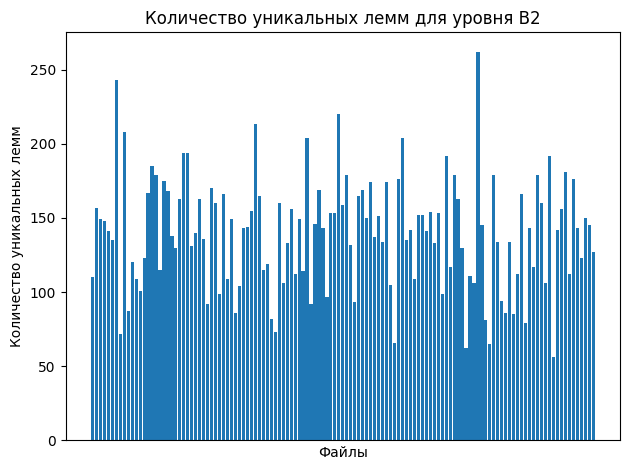

Среднее количество уникальных лемм для уровня A1: 36.35
Среднее количество уникальных лемм для уровня A2: 75.62
Среднее количество уникальных лемм для уровня B1: 106.07
Среднее количество уникальных лемм для уровня B2: 139.84


In [2]:
import os
import glob
import re
import pymorphy2
import matplotlib.pyplot as plt

# Создаем экземпляр морфологического анализатора pymorphy2
morph_analyzer = pymorphy2.MorphAnalyzer()

# Путь к папке с уровнями CEFR
cefr_levels = ["A1", "A2", "B1", "B2"]

# Список для хранения среднего количества уникальных лемм по каждому уровню CEFR
avg_unique_lemma_counts = []

# Обработка каждого уровня CEFR
for cefr_level in cefr_levels:
    folder_path = f"/content/Students_texts/{cefr_level}"
    file_list = glob.glob(os.path.join(folder_path, "*.txt"))

    unique_lemma_counts = []

    # Обработка каждого файла в текущем уровне CEFR
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

            # Удаление тегов типа моя
            text = re.sub(r'<[^>]+>', '', text)

            # Удаление [unclear]
            text = text.replace('[unclear]', '')

            # Разделение текста на слова
            words = re.findall(r'\b\w+\b', text)

            # Список для хранения уникальных лемм с частями речи
            unique_lemmas = set()

            # Обработка каждого слова
            for word in words:
                # Пропускаем пустые слова
                if not word.strip():
                    continue

                # Приведение слова к лемме
                parsed_word = morph_analyzer.parse(word.lower())[0]
                lemma = parsed_word.normal_form
                pos = parsed_word.tag.POS

                # Формируем строку из леммы и части речи
                lemma_info = f"{lemma} {pos}"

                # Добавляем лемму в множество уникальных лемм
                unique_lemmas.add(lemma_info)

            # Количество уникальных лемм в файле
            unique_lemma_count = len(unique_lemmas)
            unique_lemma_counts.append(unique_lemma_count)

    # Среднее значение уникальных лемм для текущего уровня CEFR
    avg_for_cefr = sum(unique_lemma_counts) / len(unique_lemma_counts)
    avg_unique_lemma_counts.append(avg_for_cefr)

    # Создание столбчатой диаграммы для текущего уровня CEFR
    plt.bar(range(len(file_list)), unique_lemma_counts)
    plt.xlabel('Файлы')
    plt.ylabel('Количество уникальных лемм')
    plt.title(f'Количество уникальных лемм для уровня {cefr_level}')
    plt.xticks([])
    plt.tight_layout()
    plt.show()

# Вывод средних значений на экран
for i, cefr_level in enumerate(cefr_levels):
    print(f"Среднее количество уникальных лемм для уровня {cefr_level}: {avg_unique_lemma_counts[i]:.2f}")